In [1]:
import pandas as pd   
import numpy as np    
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
## this example of iForest is for dataset II
x_train = pd.read_csv('Data/ieee_x_train.csv')
x_val = pd.read_csv('Data/ieee_x_val.csv')
x_test = pd.read_csv('Data/ieee_x_test.csv')
    
y_train = pd.read_csv('Data/ieee_y_train.csv')
y_val = pd.read_csv('Data/ieee_y_val.csv')
y_test = pd.read_csv('Data/ieee_y_test.csv')

In [137]:
#param tuning over 10 runs
def param_tuning_iForest(x_train, x_test, y_test, runs=10): #input here for x_test and y_test x_val and y_val
    
    best_setting_roc = 0
    best_setting_av_pr = 0
    
    count=0
    for n_estimators in [100, 135]:
        for boolian in [True, False]:
            for max_features in [0.85, 0.90, 0.95]:
                
                count += 1
                
                roc_auc = []
                av_pr = []
                
                clf=IsolationForest(n_estimators=n_estimators, max_samples='auto', contamination='auto', \
                        max_features=max_features, bootstrap=boolian, n_jobs=-1, verbose=0) #max_samples was checked outside of this loop
        
                for n in range(runs):
                    clf.fit(x_train)

                    y_pred = np.zeros(x_test.shape[0]) #initiating the array
                    y_pred = clf.decision_function(x_test).reshape(x_test.shape[0],)  

                    if_y_pred=y_pred
                    if_y_pred=1-if_y_pred

                    roc_auc.append(roc_auc_score(y_test, if_y_pred))
                    av_pr.append(average_precision_score(y_test, if_y_pred))

                    if n == (runs-1):
                        print('for the following settings:')
                        print('n_estimators:{n_est}, bootsrap:{bools}, max_features:{maxf}'.format(n_est=n_estimators,bools=boolian, maxf=max_features ))
                        print(round(np.average(roc_auc),4), round(np.std(roc_auc),4), round(np.average(av_pr),4), round(np.std(av_pr),4))
                        
                        if np.average(roc_auc) > best_setting_roc:
                            best_setting_roc = np.average(roc_auc)
                            print('best setting roc_auc in count', count)

                        if np.average(av_pr) > best_setting_av_pr:
                            best_setting_av_pr = np.average(av_pr)
                            print('best setting av_pr in count', count)
                    
                        print('\n')
    return 
        

In [138]:
param_tuning_iForest(x_train, x_val, y_val, runs=10)

for the following settings:
n_estimators:100, bootsrap:True, max_features:0.85
0.7021 0.01 0.1134 0.0165
best setting roc_auc in count 1
best setting av_pr in count 1


for the following settings:
n_estimators:100, bootsrap:True, max_features:0.9
0.7068 0.0101 0.1079 0.0118
best setting roc_auc in count 2


for the following settings:
n_estimators:100, bootsrap:True, max_features:0.95
0.7011 0.0126 0.1059 0.0093


for the following settings:
n_estimators:100, bootsrap:False, max_features:0.85
0.7081 0.0075 0.1074 0.0103
best setting roc_auc in count 4


for the following settings:
n_estimators:100, bootsrap:False, max_features:0.9
0.7048 0.0084 0.1036 0.0116


for the following settings:
n_estimators:100, bootsrap:False, max_features:0.95
0.6971 0.0129 0.1091 0.0122


for the following settings:
n_estimators:135, bootsrap:True, max_features:0.85
0.7065 0.0075 0.1115 0.0128


for the following settings:
n_estimators:135, bootsrap:True, max_features:0.9
0.7082 0.0066 0.1137 0.0063
best s

In [ ]:
# BEST RESULT ON VALIDATION
# for the following settings:
# n_estimators:135, bootsrap:False, max_features:0.95
# 0.7106 0.0087 0.1175 0.009

In [139]:
from sklearn.metrics import roc_auc_score, average_precision_score

# applying the best performing hyperparameter settings on test set over 10 runs
def run_iForest(x_train, x_test, y_test, algorithm, runs=10):

    roc_auc = []
    av_pr = []
    
    clf = algorithm 
    
    for n in range(runs):
        clf.fit(x_train)
        
        y_pred = np.zeros(x_test.shape[0]) #initiating the array
        y_pred = clf.decision_function(x_test).reshape(x_test.shape[0],)   #anomaly scores instead of a binary decision
                                                     
        if_y_pred=y_pred
        if_y_pred=1-if_y_pred     #originally: close to +1 = normal instance. Here this becomes close to 0. 
                                  #through 1 - pred, anomalies become closer to 1 (e.g. original value = 0.2, now 0.8)
                                  #this nicely aligns with our labels (1=anomaly, 0=normal)
            
        roc_auc.append(roc_auc_score(y_test, if_y_pred))
        av_pr.append(average_precision_score(y_test, if_y_pred))

    return roc_auc, av_pr
        

In [140]:
alg=IsolationForest(n_estimators=135, max_samples='auto', contamination='auto', \
                        max_features=0.95, bootstrap=False, n_jobs=-1, verbose=1) 

# Run
roc_auc, av_pr = run_iForest(x_train, x_test, y_test, alg, runs=10)

# Calculating average and standard deviation of both evaluation metrics
print(round(np.average(roc_auc),4), round(np.std(roc_auc),4), round(np.average(av_pr),4), round(np.std(av_pr),4))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.0min remaining:  2.0min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  3.1min remaining:  3.1min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


0.7092 0.0044 0.0856 0.0056


In [ ]:
# FINAL RESTULS ON TEST SET: 0.7092 0.0044 AUC-ROC 0.0856 0.0056 AV-PR

### Shap plot

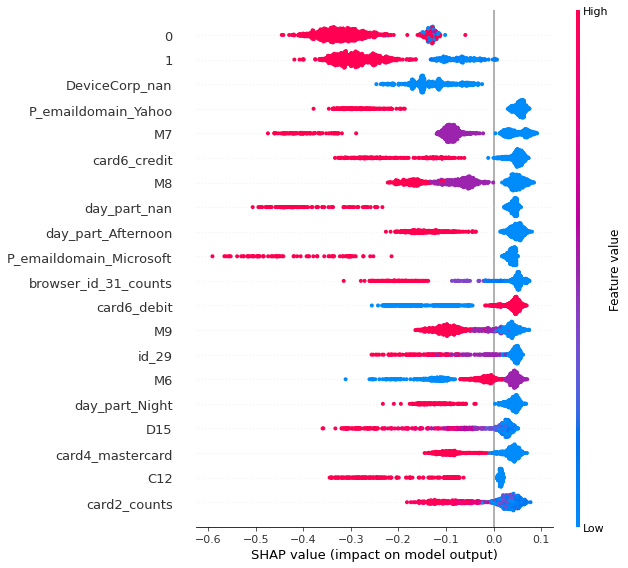

In [471]:
import shap

# Create shap values and plot them
X_explain = x_test.sample(1000)
shap_values = shap.TreeExplainer(alg).shap_values(X_explain)
shap.summary_plot(shap_values, X_explain)

In [ ]:
# for the path length figure, this was used as a basis
# https://www.kaggle.com/rgaddati/unsupervised-fraud-detection-isolation-forest